# CNN_UTK_Model for Age detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 103 116 132 145 155...  
3  193 197 198 200 199 200 202 203 204 205 208 21...  
4  202 205 209 210 209 209 210 211 212 214 218 21...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

age     ethnicity        gender
count  23705.000000  23705.000000  23705.000000
mean      33.300907      1.269226      0.477283
std       19.885708      1.345638      0.499494
min        1.000000      0.000000      0.000000
25%       23.000000      0.000000      0.000000
50%       29.000000      1.000000      0.000000
75%       45.000000      2.000000      1.000000
max      116.000000      4.000000      1.000000

In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  [129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...  
1  [164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....  
2  [67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....  
3  [193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...  
4  [202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...

In [7]:
# taking range of 5
df['age'] //= 5

### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

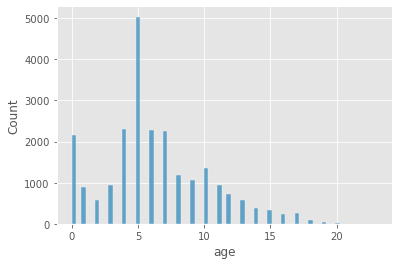

In [8]:
sns.histplot(data=df, x='age')

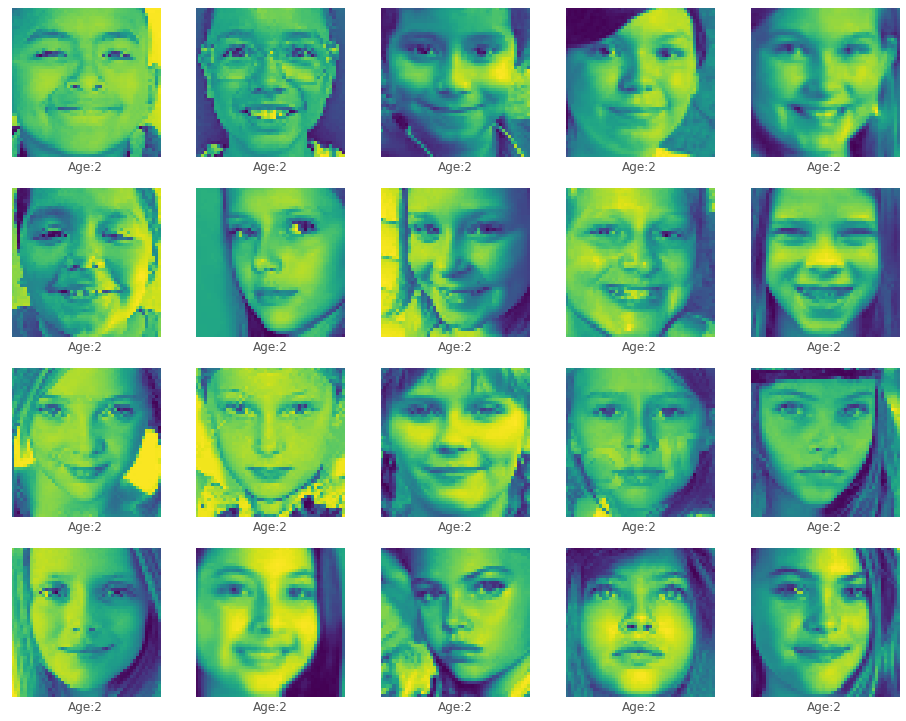

In [9]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [10]:
X = np.array(df['pixels'].tolist())
X = X.reshape(X.shape[0],48,48,1)
y = df['age']

In [11]:
X[:5].shape

(5, 48, 48, 1)

In [12]:
y[:5].shape

(5,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model creation

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(8, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4232)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                67728     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 67,825
Trainable params: 67,825
Non-trainable params: 0
_________________________________________________________________


In [27]:
filepath = 'checkpoints/age_range_model1_corrected.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [28]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
259/260 [============================>.] - ETA: 0s - loss: 9.4956 - mae: 2.3292
Epoch 00001: val_loss improved from inf to 7.29537, saving model to checkpoints\age_range_model1_corrected.epoch01-loss7.30.hdf5
260/260 [==============================] - 4s 16ms/step - loss: 9.4887 - mae: 2.3281 - val_loss: 7.2954 - val_mae: 2.0063
Epoch 2/100
259/260 [============================>.] - ETA: 0s - loss: 6.5586 - mae: 1.9422
Epoch 00002: val_loss improved from 7.29537 to 6.05125, saving model to checkpoints\age_range_model1_corrected.epoch02-loss6.05.hdf5
260/260 [==============================] - 4s 16ms/step - loss: 6.5548 - mae: 1.9416 - val_loss: 6.0513 - val_mae: 1.8470
Epoch 3/100
256/260 [============================>.] - ETA: 0s - loss: 5.8746 - mae: 1.8252
Epoch 00003: val_loss improved from 6.05125 to 5.96312, saving model to checkpoints\age_range_model1_corrected.epoch03-loss5.96.hdf5
260/260 [==============================] - 4s 16ms/step - loss: 5.8571 - mae: 1.8229 

Epoch 29/100
258/260 [============================>.] - ETA: 0s - loss: 2.1936 - mae: 1.0809
Epoch 00029: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 18ms/step - loss: 2.1913 - mae: 1.0802 - val_loss: 5.4752 - val_mae: 1.6506
Epoch 30/100
257/260 [============================>.] - ETA: 0s - loss: 2.1515 - mae: 1.0721
Epoch 00030: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 18ms/step - loss: 2.1554 - mae: 1.0723 - val_loss: 6.0185 - val_mae: 1.7536
Epoch 31/100
257/260 [============================>.] - ETA: 0s - loss: 2.1480 - mae: 1.0732
Epoch 00031: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 18ms/step - loss: 2.1538 - mae: 1.0741 - val_loss: 5.4608 - val_mae: 1.6675
Epoch 32/100
259/260 [============================>.] - ETA: 0s - loss: 2.0192 - mae: 1.0384
Epoch 00032: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 19ms/step - 

Epoch 60/100
259/260 [============================>.] - ETA: 0s - loss: 1.3764 - mae: 0.8625
Epoch 00060: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 19ms/step - loss: 1.3799 - mae: 0.8634 - val_loss: 6.5194 - val_mae: 1.8164
Epoch 61/100
259/260 [============================>.] - ETA: 0s - loss: 1.3683 - mae: 0.8564
Epoch 00061: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 21ms/step - loss: 1.3686 - mae: 0.8566 - val_loss: 5.9926 - val_mae: 1.6979
Epoch 62/100
258/260 [============================>.] - ETA: 0s - loss: 1.3734 - mae: 0.8595
Epoch 00062: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 21ms/step - loss: 1.3724 - mae: 0.8595 - val_loss: 5.7802 - val_mae: 1.6674
Epoch 63/100
259/260 [============================>.] - ETA: 0s - loss: 1.2386 - mae: 0.8193
Epoch 00063: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 19ms/step - 

Epoch 91/100
257/260 [============================>.] - ETA: 0s - loss: 0.8584 - mae: 0.6870
Epoch 00091: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 19ms/step - loss: 0.8576 - mae: 0.6871 - val_loss: 6.4902 - val_mae: 1.7767
Epoch 92/100
258/260 [============================>.] - ETA: 0s - loss: 0.9684 - mae: 0.7223
Epoch 00092: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 21ms/step - loss: 0.9685 - mae: 0.7217 - val_loss: 6.6727 - val_mae: 1.8056
Epoch 93/100
260/260 [==============================] - ETA: 0s - loss: 0.9337 - mae: 0.7146
Epoch 00093: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 20ms/step - loss: 0.9337 - mae: 0.7146 - val_loss: 6.3543 - val_mae: 1.7526
Epoch 94/100
258/260 [============================>.] - ETA: 0s - loss: 0.8731 - mae: 0.6927
Epoch 00094: val_loss did not improve from 4.78228
260/260 [==============================] - 5s 19ms/step - 

<AxesSubplot:>

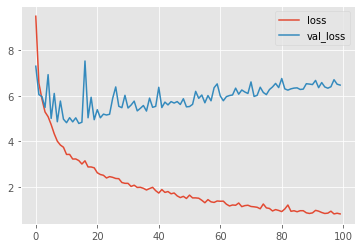

In [29]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [30]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

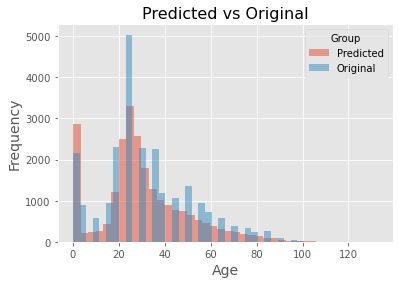

In [32]:
pd.Series((5 * y_pred.reshape((len(y_pred))))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
(5 * y).plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

### Predictions for best model

In [33]:
import os
path = os.getcwd() + r'\checkpoints\age_range_model1_corrected.epoch15-loss4.78.hdf5'

In [34]:
best_model = tf.keras.models.load_model(path)

In [35]:
y_pred_best = best_model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

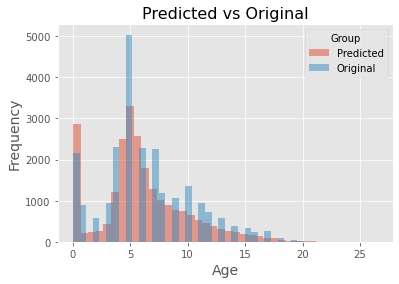

In [36]:
pd.Series(y_pred.reshape((len(y_pred_best)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)